In [3]:
import pandas as pd
import numpy as np

In [4]:
dt=pd.read_csv('training .csv')

In [5]:
dt.head()

android  android.app.cts.permission.TEST_GRANTED  \
0        0                                        0   
1        0                                        0   
2        0                                        0   
3        0                                        0   
4        0                                        0   

   android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   android.os.cts.permission.TEST_GRANTED  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   android.permission.ACCESS_ALL_DOWNLOADS  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   android.permission.ACCESS_ALL_EXTERNAL_STORAGE  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   android.permission.ACCESS_BLUETOOTH_SHARE  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   android.permission.ACCESS_CACHE_FILESYSTEM  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   android.permission.ACCESS_CHECKIN_PROPERTIES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   android.permission.ACCESS_COARSE_LOCATION  ...  \
0                                          0  ...   
1                                          0  ...   
2                                          0  ...   
3                                          0  ...   
4                                          0  ...   

   com.android.voicemail.permission.WRITE_VOICEMAIL  com.foo.mypermission  \
0                                                 0                     0   
1                                                 0                     0   
2                                                 0                     0   
3                                                 0                     0   
4                                                 0                     0   

   com.foo.mypermission2  org.chromium.chrome.shell.permission.C2D_MESSAGE  \
0                      0                                                 0   
1                      0                                                 0   
2                      0                                                 0   
3                      0                                                 0   
4                      0                                                 0   

   org.chromium.chrome.shell.permission.DEBUG  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                    

In [6]:
dt.columns


Index(['android', 'android.app.cts.permission.TEST_GRANTED',
       'android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE',
       'android.os.cts.permission.TEST_GRANTED',
       'android.permission.ACCESS_ALL_DOWNLOADS',
       'android.permission.ACCESS_ALL_EXTERNAL_STORAGE',
       'android.permission.ACCESS_BLUETOOTH_SHARE',
       'android.permission.ACCESS_CACHE_FILESYSTEM',
       'android.permission.ACCESS_CHECKIN_PROPERTIES',
       'android.permission.ACCESS_COARSE_LOCATION',
       ...
       'com.android.voicemail.permission.WRITE_VOICEMAIL',
       'com.foo.mypermission', 'com.foo.mypermission2',
       'org.chromium.chrome.shell.permission.C2D_MESSAGE',
       'org.chromium.chrome.shell.permission.DEBUG',
       'org.chromium.chrome.shell.permission.SANDBOX',
       'org.chromium.chromecast.shell.permission.SANDBOX',
       'org.chromium.content_shell.permission.SANDBOX', 'test_permission',
       'type'],
      dtype='object', length=331)

In [7]:
dt.dtypes


android                                                        int64
android.app.cts.permission.TEST_GRANTED                        int64
android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE    int64
android.os.cts.permission.TEST_GRANTED                         int64
android.permission.ACCESS_ALL_DOWNLOADS                        int64
                                                               ...  
org.chromium.chrome.shell.permission.SANDBOX                   int64
org.chromium.chromecast.shell.permission.SANDBOX               int64
org.chromium.content_shell.permission.SANDBOX                  int64
test_permission                                                int64
type                                                           int64
Length: 331, dtype: object

In [8]:
#to remove the spaces
cols = {}
for name in dt.columns:
        if name[0] is ' ':
            cols[name] = name[1:]
dt.rename(cols, axis=1, inplace=True, errors='raise')

In [9]:
dt.columns


Index(['android', 'android.app.cts.permission.TEST_GRANTED',
       'android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE',
       'android.os.cts.permission.TEST_GRANTED',
       'android.permission.ACCESS_ALL_DOWNLOADS',
       'android.permission.ACCESS_ALL_EXTERNAL_STORAGE',
       'android.permission.ACCESS_BLUETOOTH_SHARE',
       'android.permission.ACCESS_CACHE_FILESYSTEM',
       'android.permission.ACCESS_CHECKIN_PROPERTIES',
       'android.permission.ACCESS_COARSE_LOCATION',
       ...
       'com.android.voicemail.permission.WRITE_VOICEMAIL',
       'com.foo.mypermission', 'com.foo.mypermission2',
       'org.chromium.chrome.shell.permission.C2D_MESSAGE',
       'org.chromium.chrome.shell.permission.DEBUG',
       'org.chromium.chrome.shell.permission.SANDBOX',
       'org.chromium.chromecast.shell.permission.SANDBOX',
       'org.chromium.content_shell.permission.SANDBOX', 'test_permission',
       'type'],
      dtype='object', length=331)

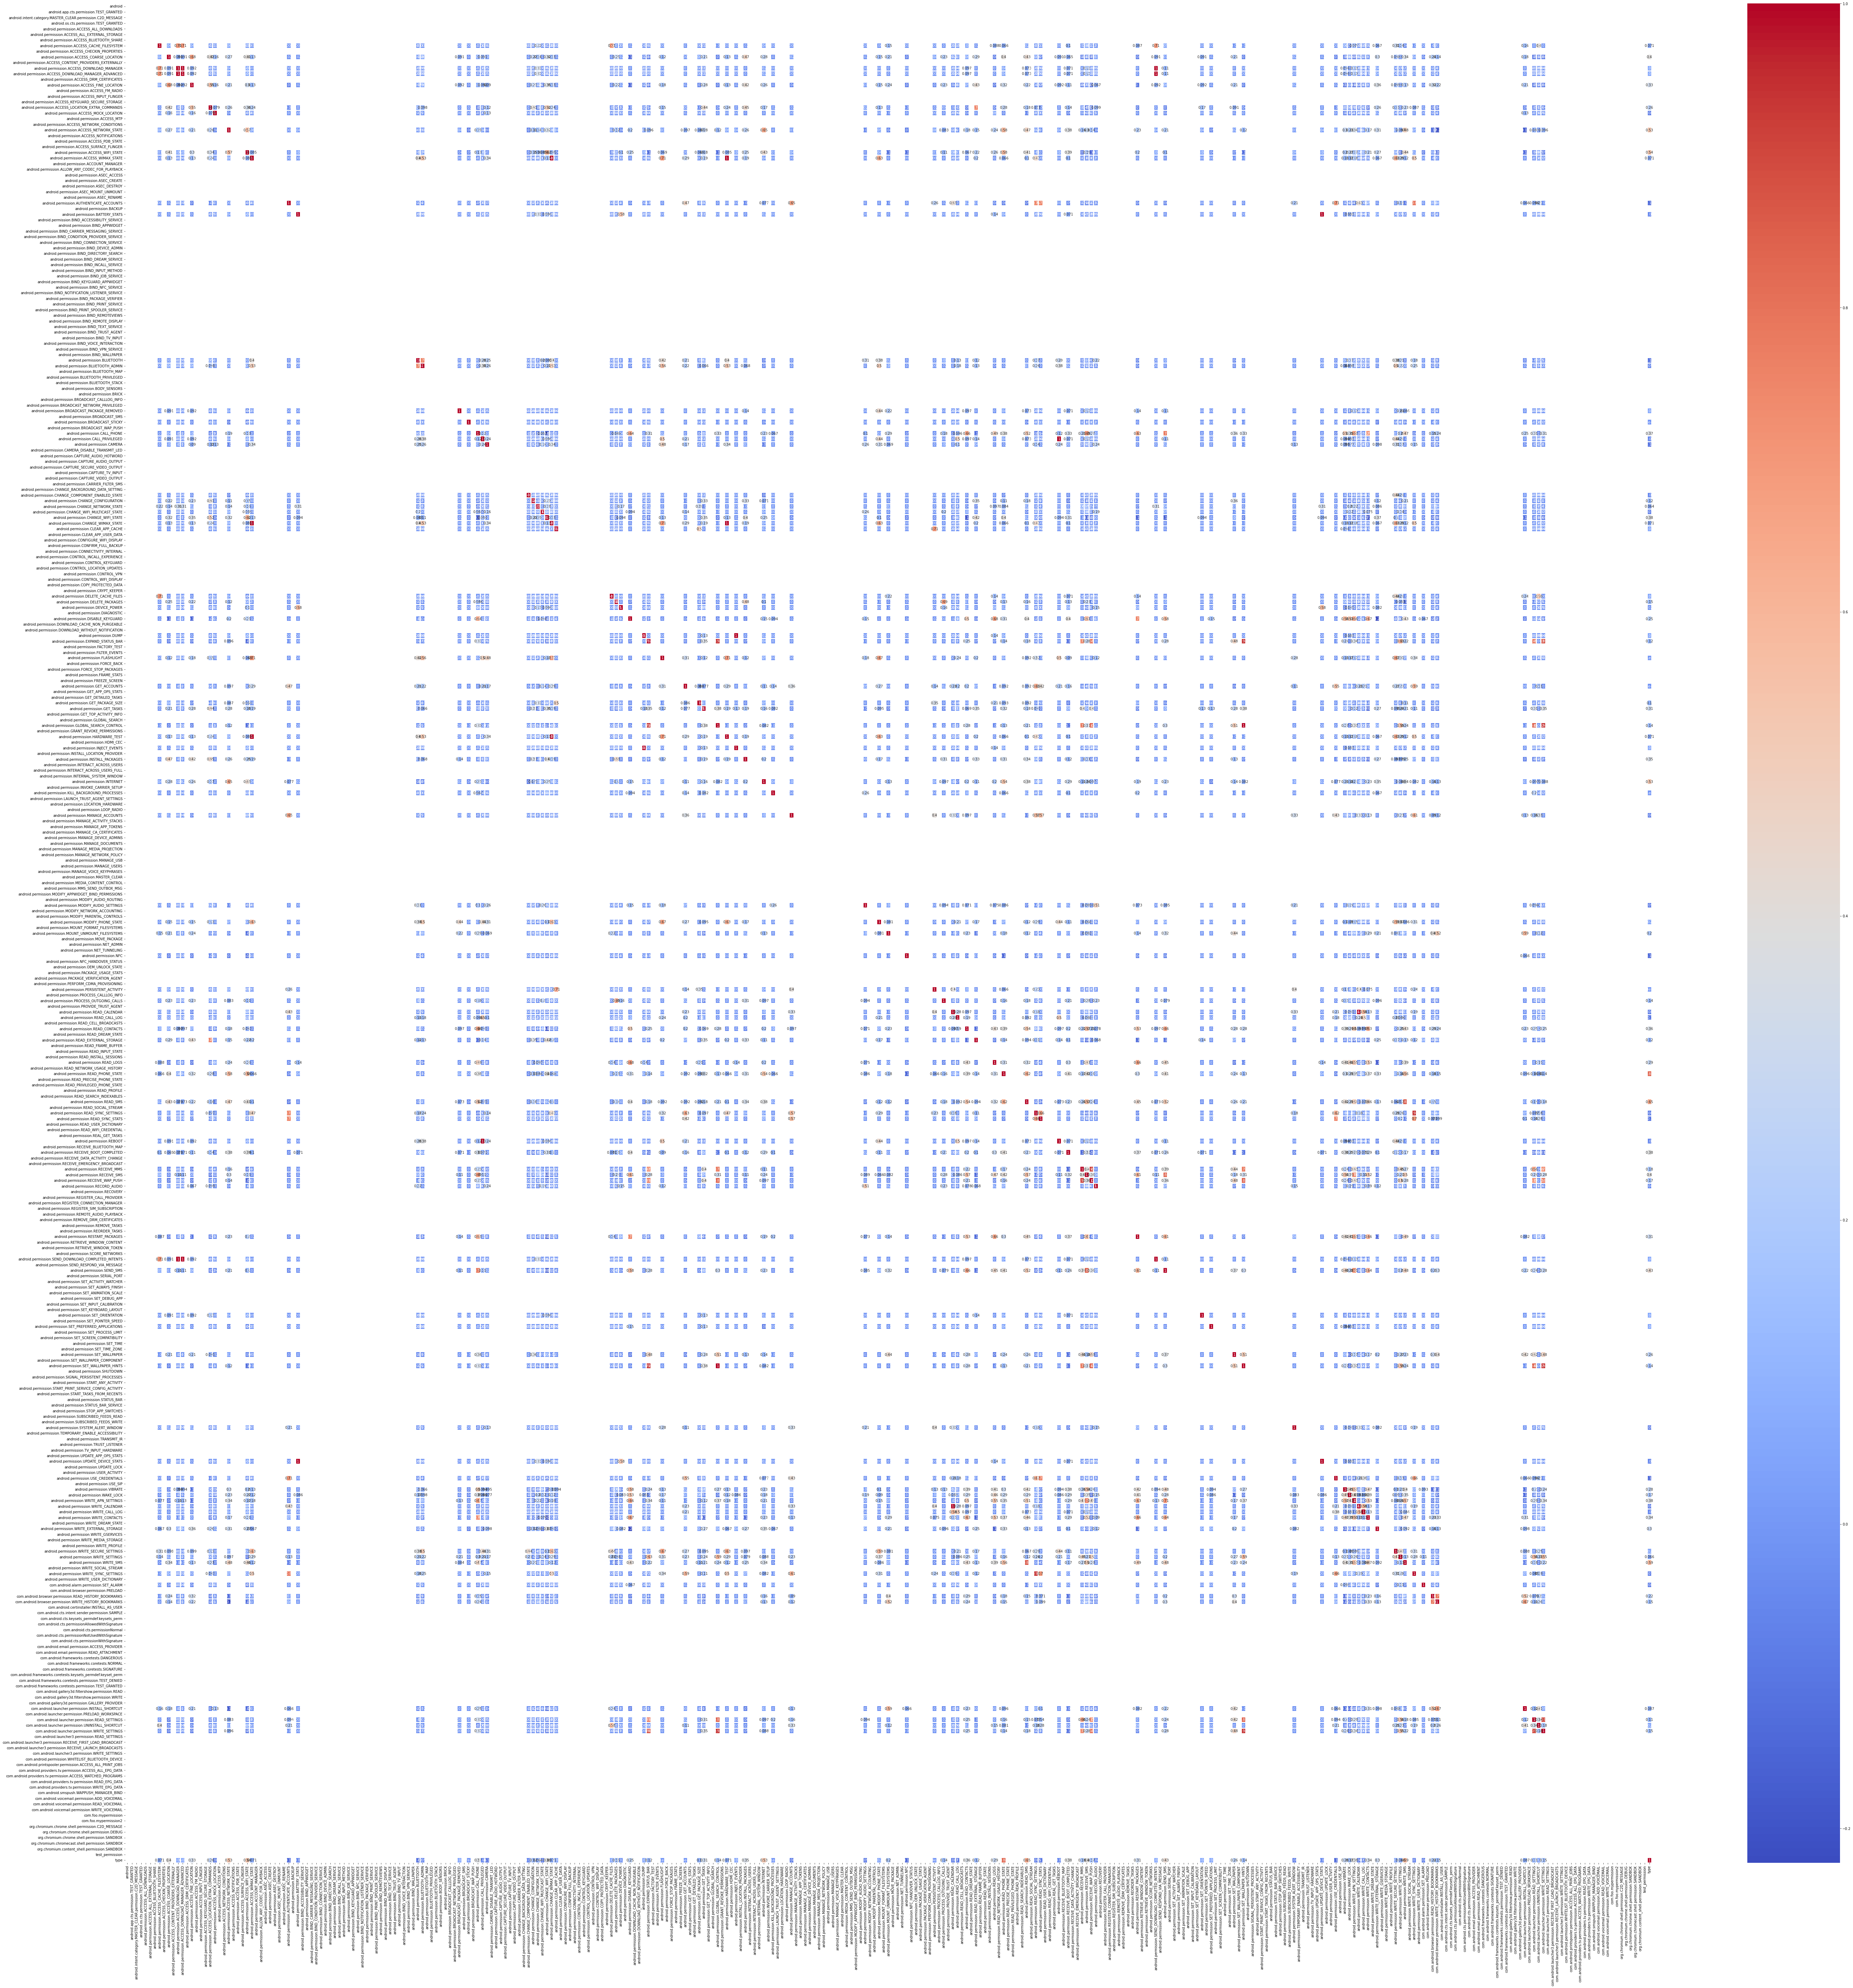

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
plt.figure(figsize=(100,100))
sns.heatmap(dt.corr(),annot=True,cmap="coolwarm",linewidth=2 )

In [11]:
from sklearn.feature_selection import VarianceThreshold #features with low variance are less likely to be useful than features with high variance
var_thres=VarianceThreshold(threshold=0) # creating thresholder
var_thres.fit(dt) # creating high variance features

VarianceThreshold(threshold=0)

In [12]:
var_thres.get_support() 

array([False, False, False, False, False, False, False,  True, False,
        True, False,  True,  True, False,  True, False, False, False,
        True,  True, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True, False,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True, False, False,  True,
       False, False, False, False,  True, False, False,  True,  True,
       False, False,

In [13]:
dt.columns[var_thres.get_support()]

Index(['android.permission.ACCESS_CACHE_FILESYSTEM',
       'android.permission.ACCESS_COARSE_LOCATION',
       'android.permission.ACCESS_DOWNLOAD_MANAGER',
       'android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED',
       'android.permission.ACCESS_FINE_LOCATION',
       'android.permission.ACCESS_LOCATION_EXTRA_COMMANDS',
       'android.permission.ACCESS_MOCK_LOCATION',
       'android.permission.ACCESS_NETWORK_STATE',
       'android.permission.ACCESS_WIFI_STATE',
       'android.permission.ACCESS_WIMAX_STATE',
       'android.permission.AUTHENTICATE_ACCOUNTS',
       'android.permission.BATTERY_STATS', 'android.permission.BLUETOOTH',
       'android.permission.BLUETOOTH_ADMIN',
       'android.permission.BROADCAST_PACKAGE_REMOVED',
       'android.permission.BROADCAST_STICKY', 'android.permission.CALL_PHONE',
       'android.permission.CALL_PRIVILEGED', 'android.permission.CAMERA',
       'android.permission.CHANGE_COMPONENT_ENABLED_STATE',
       'android.permission.CHANGE_CO

In [14]:
cols_to_keep = [column for column in dt.columns
                    if column in dt.columns[var_thres.get_support()]]

In [15]:
cols_to_keep

['android.permission.ACCESS_CACHE_FILESYSTEM',
 'android.permission.ACCESS_COARSE_LOCATION',
 'android.permission.ACCESS_DOWNLOAD_MANAGER',
 'android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED',
 'android.permission.ACCESS_FINE_LOCATION',
 'android.permission.ACCESS_LOCATION_EXTRA_COMMANDS',
 'android.permission.ACCESS_MOCK_LOCATION',
 'android.permission.ACCESS_NETWORK_STATE',
 'android.permission.ACCESS_WIFI_STATE',
 'android.permission.ACCESS_WIMAX_STATE',
 'android.permission.AUTHENTICATE_ACCOUNTS',
 'android.permission.BATTERY_STATS',
 'android.permission.BLUETOOTH',
 'android.permission.BLUETOOTH_ADMIN',
 'android.permission.BROADCAST_PACKAGE_REMOVED',
 'android.permission.BROADCAST_STICKY',
 'android.permission.CALL_PHONE',
 'android.permission.CALL_PRIVILEGED',
 'android.permission.CAMERA',
 'android.permission.CHANGE_COMPONENT_ENABLED_STATE',
 'android.permission.CHANGE_CONFIGURATION',
 'android.permission.CHANGE_NETWORK_STATE',
 'android.permission.CHANGE_WIFI_MULTICAST_STAT

In [16]:
print(len(cols_to_keep))

93


In [17]:
print('Dropping unnecessary columns...')


dt.drop(columns=[col for col in dt.columns if col not in cols_to_keep], inplace=True, errors='raise') 
dt.dropna(inplace=True)
    
print('{} cleaned\n\tCreating general csv...'.format(dt))


Dropping unnecessary columns...
     android.permission.ACCESS_CACHE_FILESYSTEM  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
..                                          ...   
393                                           0   
394                                           0   
395                                           0   
396                                           0   
397                                           0   

     android.permission.ACCESS_COARSE_LOCATION  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
..                                         ...   
393  

In [18]:
dt.shape

(398, 93)

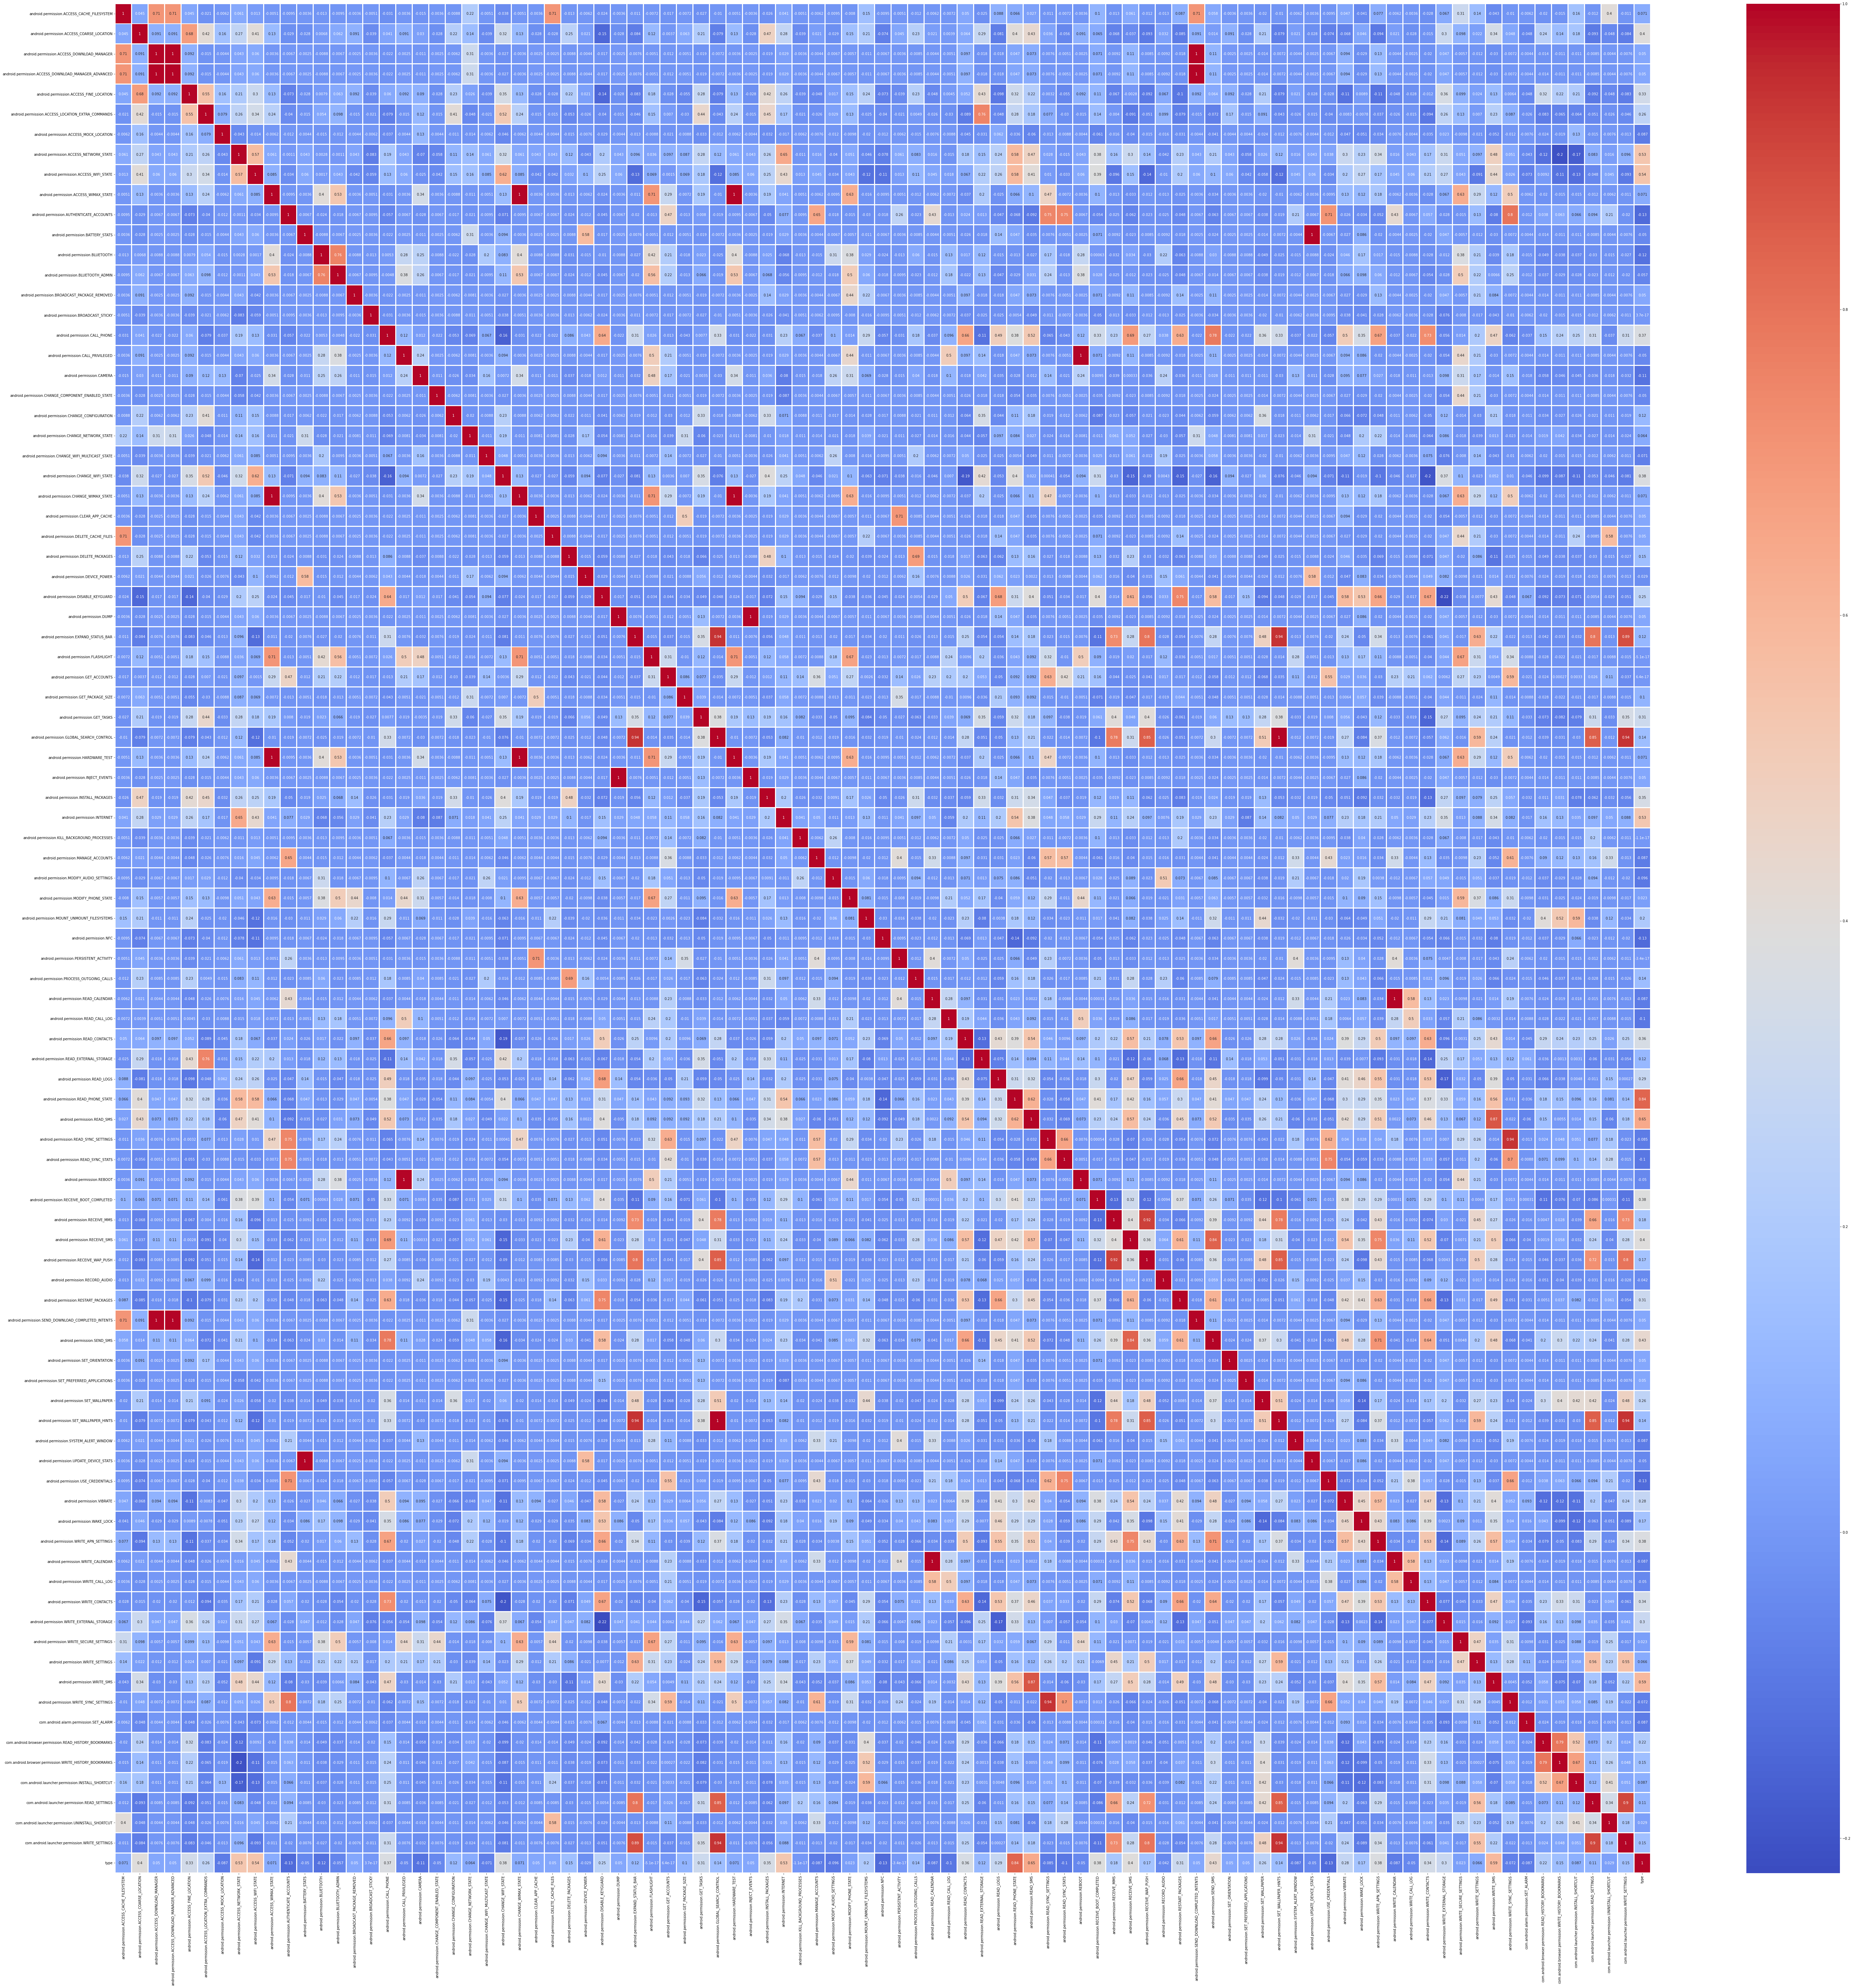

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
plt.figure(figsize=(100,100))
sns.heatmap(dt.corr(),annot=True,cmap="coolwarm",linewidth=2 )

In [20]:
dt.isna().any()
dt.isna().sum()

android.permission.ACCESS_CACHE_FILESYSTEM             0
android.permission.ACCESS_COARSE_LOCATION              0
android.permission.ACCESS_DOWNLOAD_MANAGER             0
android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED    0
android.permission.ACCESS_FINE_LOCATION                0
                                                      ..
com.android.launcher.permission.INSTALL_SHORTCUT       0
com.android.launcher.permission.READ_SETTINGS          0
com.android.launcher.permission.UNINSTALL_SHORTCUT     0
com.android.launcher.permission.WRITE_SETTINGS         0
type                                                   0
Length: 93, dtype: int64

In [21]:
from keras.models import Sequential, Model #sequential to arrange the layers in sequential order
                                           #model to access the model's information
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import train_test_split
import tensorflow
import numpy as np
from sklearn.preprocessing import LabelEncoder#Encode target labels with value between 0 and n_classes-1.

In [22]:
Y = dt['type']
#print(Y)
X = dt.drop(['type'], axis=1)
encoder = LabelEncoder().fit(Y)
Y = encoder.transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

In [23]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

33

In [25]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [26]:
'''print('Dropping unnecessary columns...')'''
dt.drop(columns=[col for col in dt.columns if col in corr_features], inplace=True, errors='raise') 
dt.dropna(inplace=True)

In [27]:
dt.shape[1]

60

In [28]:
dt.columns

Index(['android.permission.ACCESS_CACHE_FILESYSTEM',
       'android.permission.ACCESS_COARSE_LOCATION',
       'android.permission.ACCESS_FINE_LOCATION',
       'android.permission.ACCESS_LOCATION_EXTRA_COMMANDS',
       'android.permission.ACCESS_MOCK_LOCATION',
       'android.permission.ACCESS_NETWORK_STATE',
       'android.permission.ACCESS_WIFI_STATE',
       'android.permission.ACCESS_WIMAX_STATE',
       'android.permission.AUTHENTICATE_ACCOUNTS',
       'android.permission.BATTERY_STATS', 'android.permission.BLUETOOTH',
       'android.permission.BROADCAST_PACKAGE_REMOVED',
       'android.permission.BROADCAST_STICKY', 'android.permission.CALL_PHONE',
       'android.permission.CALL_PRIVILEGED', 'android.permission.CAMERA',
       'android.permission.CHANGE_COMPONENT_ENABLED_STATE',
       'android.permission.CHANGE_CONFIGURATION',
       'android.permission.CHANGE_NETWORK_STATE',
       'android.permission.CHANGE_WIFI_MULTICAST_STATE',
       'android.permission.CHANGE_WIFI_

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

AN = Sequential()  # defining the model
AN.add(Bidirectional(LSTM(256, activation='relu'), input_shape=(dt.shape[1]-1, 1)))
AN.add(Dropout(0.2))
AN.add(Dense(128, activation='relu'))
AN.add(Dropout(0.2))
AN.add(Dense(128, activation='relu'))
AN.add(Dropout(0.2))
AN.add(Dense(32, activation='relu'))
AN.add(Dropout(0.2))
AN.add(Dense(1, activation='sigmoid'))



In [33]:

# AN = Sequential() #defining the Model
# AN.add(Dense(256, activation='relu', input_dim=dt.shape[1]-1))#adds a layer (units),specifies the input shape
# AN.add(Dropout(0.2))#(droput rate) to avoid overfitting 
# AN.add(Dense(128, activation='relu'))
# AN.add(Dropout(0.2))
# AN.add(Dense(128, activation='relu'))
# AN.add(Dropout(0.2))
# AN.add(Dense(32, activation='relu'))
# AN.add(Dropout(0.2))
# AN.add(Dense(1, activation='sigmoid'))#due to binary classification sigmoid function is used.(output layer)



AN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = AN.fit(X_train, y_train, epochs=20, batch_size=32)#model training 


scores = AN.evaluate(X_test, y_test)#check whether the model is best fit for the given problem and corresponding data
                    
for i in range(len(scores)):
  print("\n%s: %.2f%%" % (AN.metrics_names[i], scores[i]*100))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8/8 [==============================] - 6s 240ms/step - loss: 0.6853 - accuracy: 0.6092
Epoch 2/20
8/8 [==============================] - 2s 238ms/step - loss: 0.6346 - accuracy: 0.5672
Epoch 3/20
8/8 [==============================] - 2s 232ms/step - loss: 0.6235 - accuracy: 0.7941
Epoch 4/20
8/8 [==============================] - 2s 237ms/step - loss: 0.6209 - acc

In [30]:
AN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               15360     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                4

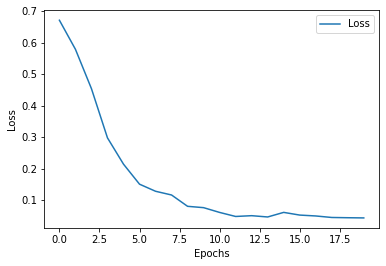

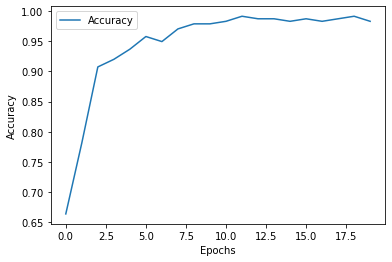

In [31]:
import matplotlib.pyplot as plt
loss = history.history['loss']
accuracy = history.history['accuracy']
# Plotting the loss
plt.plot(loss, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the accuracy
plt.plot(accuracy, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

